In [1]:
import pandas as pd

In [7]:
df = pd.read_parquet('/Users/raghulgopal/Desktop/MLOPs Dev/data/green_tripdata_2025-08.parquet')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-08-01 00:33:57,2025-08-01 00:58:10,N,1.0,70,82,1.0,2.44,21.9,...,0.5,0.00,0.0,NaN,1.0,24.40,2.0,1.0,0.00,0.0
1,2,2025-08-01 00:01:00,2025-08-01 00:12:58,N,1.0,130,216,1.0,4.06,18.4,...,0.5,0.00,0.0,NaN,1.0,20.90,2.0,1.0,0.00,0.0
2,2,2025-08-01 00:11:02,2025-08-01 00:16:06,N,1.0,74,263,1.0,2.09,10.0,...,0.5,3.05,0.0,NaN,1.0,18.30,1.0,1.0,2.75,0.0
3,2,2025-08-01 00:44:09,2025-08-01 00:47:04,N,1.0,42,41,1.0,0.53,5.1,...,0.5,0.00,0.0,NaN,1.0,7.60,2.0,1.0,0.00,0.0
4,2,2025-08-01 00:57:06,2025-08-01 01:05:32,N,1.0,75,239,1.0,2.28,12.1,...,0.5,3.47,0.0,NaN,1.0,20.82,1.0,1.0,2.75,0.0


In [10]:
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [14]:
speed = df['trip_distance'] / (df['duration'] / 60)  # duration is in minutes, convert to hours
speed.describe()

/Users/raghulgopal/Desktop/MLOPs Dev/.venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    4.627100e+04
mean              inf
std               NaN
min      0.000000e+00
25%      8.326057e+00
50%      1.065124e+01
75%      1.450039e+01
max               inf
dtype: float64

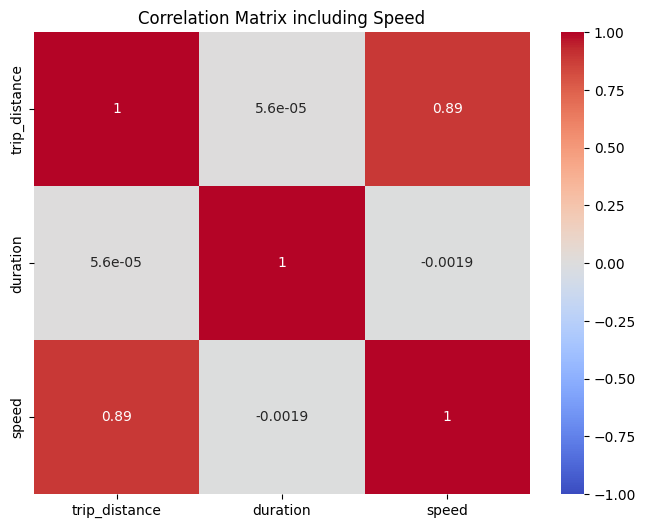

In [13]:
# Correlation between trip distance, trip duration and speed
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[['trip_distance', 'duration']].copy()
correlation_matrix['speed'] = speed
correlation_matrix = correlation_matrix.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix including Speed')
plt.show()